In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch_geometric as pyg
import torch
import pandas as pd
from torch_geometric.utils import to_undirected
import networkx as nx
from utils import dataset_gen

In [3]:
train_perc = [25,50,75,100]
data = np.load(str(train_perc[1])+'Percent.npz')
x_loaded = data['x']
y_loaded = data['y']
z_loaded = data['z']
connectivity = data['connectivity']
WSS_loaded = data['WSS']
OSI_loaded = data['OSI']
TAWSS_loaded = data['TAWSS']
edge_index = [[],[]]
for i in range(connectivity.shape[0]):
    edge_index[0].append(connectivity[i,0])
    edge_index[1].append(connectivity[i,1])
    edge_index[0].append(connectivity[i,0])
    edge_index[1].append(connectivity[i,2])
    edge_index[0].append(connectivity[i,1])
    edge_index[1].append(connectivity[i,2])
a = np.unique(edge_index, axis=1)
mesh = pyg.data.Data(edge_index=to_undirected(torch.tensor(a, dtype=torch.int64)))
mesh.num_nodes = x_loaded.shape[0]
coord = np.stack([x_loaded,y_loaded,z_loaded]).T
G = pyg.utils.to_networkx(mesh, to_undirected=True)
# Create the 3D figure



Drawing with NetworkX


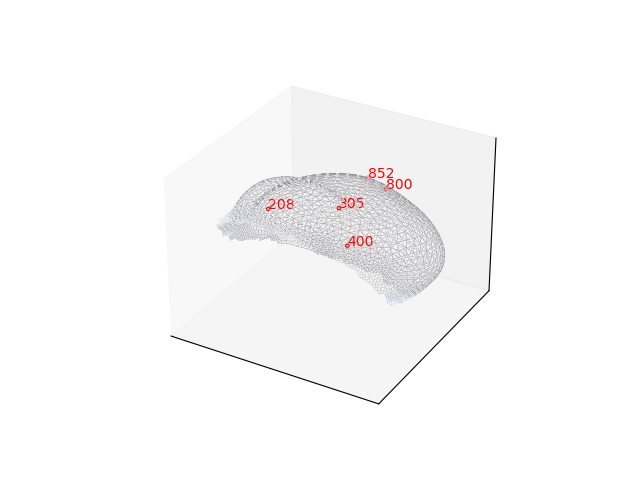

In [32]:
%matplotlib widget
fig = plt.figure()

from mpl_toolkits.mplot3d import Axes3D 
ax = fig.add_subplot(111, projection="3d")
node_xyz = np.array([coord[v] for v in sorted(G)])
edge_xyz = np.array([(coord[u], coord[v]) for u, v in G.edges()])
nodes = [208, 305, 400, 800, 852]
# Plot the nodes - alpha is scaled by "depth" automatically
ax.scatter(*node_xyz.T, s=0.2, ec="w", color = 'blue')
ax.scatter(*node_xyz[nodes,:].T, s = 5, color = 'red')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
for i, n in enumerate(nodes):
    ax.text(*node_xyz[n,:].T, str(n), color = 'red')
# Plot the edges
for vizedge in edge_xyz:
    ax.plot(*vizedge.T, linewidth=0.2, color="tab:gray")
plt.show()
plt.savefig('selected_nodes.pdf')